<a href="https://colab.research.google.com/github/devbijoy274/AI_Implementation/blob/master/PredictTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
features = pd.read_csv('temps.csv')
print(features.shape)
print(features.head(10))

(348, 12)
   year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1    Fri      45      45     45.6      45             43   
1  2016      1    2    Sat      44      45     45.7      44             41   
2  2016      1    3    Sun      45      44     45.8      41             43   
3  2016      1    4    Mon      44      41     45.9      40             44   
4  2016      1    5   Tues      41      40     46.0      44             46   
5  2016      1    6    Wed      40      44     46.1      51             43   
6  2016      1    7  Thurs      44      51     46.2      45             45   
7  2016      1    8    Fri      51      45     46.3      48             43   
8  2016      1    9    Sat      45      48     46.4      50             46   
9  2016      1   10    Sun      48      50     46.5      52             45   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2    

In [67]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


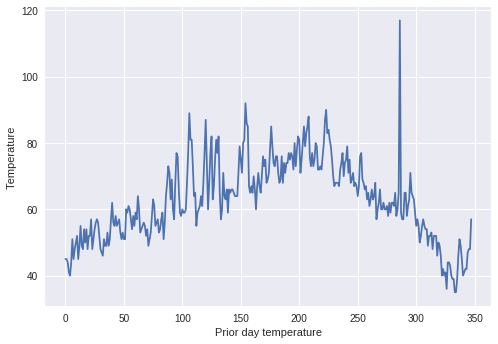

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(features.temp_1)
plt.xlabel('Prior day temperature')
plt.ylabel('Temperature')
plt.show()

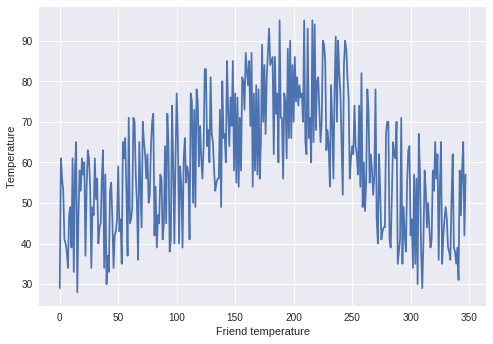

In [69]:
plt.plot(features.friend)
plt.xlabel('Friend temperature')
plt.ylabel('Temperature')
plt.show()

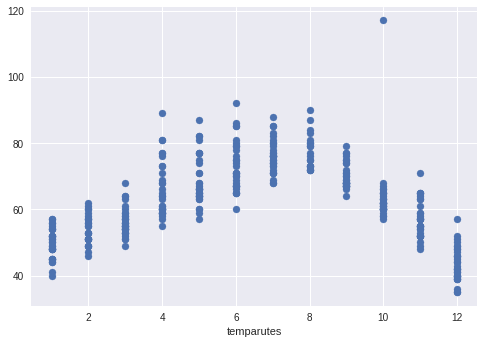

In [70]:
plt.scatter('month','temp_1',data=features)
plt.xlabel('temparutes')
plt.show()

In [71]:
features = pd.get_dummies(features)
features.iloc[:5,:]

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [0]:
import numpy as np

labels = np.array(features['actual'])
features = features.drop('actual',axis=1)

In [73]:
features_list = list(features.columns)
features = np.array(features)

from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (261, 17))
('Training Labels Shape:', (261,))
('Testing Features Shape:', (87, 17))
('Testing Labels Shape:', (87,))


In [74]:
baselinePred = test_features[:, features_list.index('average')]
absError = abs(baselinePred - test_labels)
print("Average Abosolute Error",round(np.mean(absError),2))

('Average Abosolute Error', 5.06)


In [75]:
# importing Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_features,train_labels)
pred = rf.predict(test_features)

errors = abs(pred - test_labels)

print("Average Errors", round(np.mean(errors),2))


('Average Errors', 3.87)
